import pandas, statistics, and scipy.stats, then read in the annotation files

In [2]:
import pandas as pd
import numpy as np
from statistics import mean
import scipy.stats 
import matplotlib.pyplot as plt

In [3]:
OPN1LW_df = pd.read_csv('OPN1LW_annotations.txt', sep='\t', header = 0, names = ['chr','cons','region','start','stop','junk1','junk2','junk3','id'])
OPN1MW_df = pd.read_csv('OPN1MW_annotations.txt', sep='\t', header = 0, names = ['chr','cons','region','start','stop','junk1','junk2','junk3','id'])
OPN1SW_df = pd.read_csv('OPN1SW_annotations.txt', sep='\t', header = 0, names = ['chr','cons','region','start','stop','junk1','junk2','junk3','id'])

chr7_var = pd.read_csv('chr7_variants.txt',sep='\t',header=0,names=['chr','start','stop','freqs','junk','junk2'])
chrX_var = pd.read_csv('chrX_variants.txt',sep='\t',header=0,names=['chr','start','stop','freqs','junk','junk2'])

take a look at the data contained in the annotation files

In [4]:
print(chr7_var.head())

   chr  start   stop                                              freqs junk  \
0    7  16486  16487  ERATE=0.0118;LDAF=0.8149;AN=2184;AC=1968;VT=SN...    .   
1    7  16510  16511  AA=.;AC=2155;AF=0.99;AFR_AF=0.95;AMR_AF=1.00;A...    .   
2    7  16654  16655  LDAF=0.3636;AN=2184;AC=418;VT=SNP;AA=.;ERATE=0...    .   
3    7  16718  16719  THETA=0.0164;RSQ=0.1774;AN=2184;VT=SNP;AA=.;SN...    .   
4    7  17711  17712  AA=.;AC=51;AF=0.02;AFR_AF=0.0020;AMR_AF=0.03;A...    .   

  junk2  
0     +  
1     +  
2     +  
3     +  
4     +  


retrieve protein-coding regions (CDS) only

In [5]:
OPN1LW_CDS = OPN1LW_df[OPN1LW_df['region']=='CDS'].copy()
OPN1MW_CDS = OPN1MW_df[OPN1MW_df['region']=='CDS'].copy()
OPN1SW_CDS = OPN1SW_df[OPN1SW_df['region']=='CDS'].copy()

In [6]:
print(OPN1LW_CDS['id'])

2     ID=CDS:ENST00000369951.9;Parent=ENST0000036995...
5     ID=CDS:ENST00000369951.9;Parent=ENST0000036995...
7     ID=CDS:ENST00000369951.9;Parent=ENST0000036995...
9     ID=CDS:ENST00000369951.9;Parent=ENST0000036995...
11    ID=CDS:ENST00000369951.9;Parent=ENST0000036995...
13    ID=CDS:ENST00000369951.9;Parent=ENST0000036995...
24    ID=CDS:ENST00000442922.1;Parent=ENST0000044292...
26    ID=CDS:ENST00000442922.1;Parent=ENST0000044292...
28    ID=CDS:ENST00000442922.1;Parent=ENST0000044292...
30    ID=CDS:ENST00000442922.1;Parent=ENST0000044292...
Name: id, dtype: object


retrieve the start and stop coordinates for each gene and load them to a list

In [7]:
OPN1LW_starts = OPN1LW_CDS['start'].tolist()
OPN1LW_stops = OPN1LW_CDS['stop'].tolist()
OPN1LW_coords = OPN1LW_starts + OPN1LW_stops
OPN1LW_coords.sort()
print(OPN1LW_coords)

[154144284, 154144395, 154150656, 154150952, 154152940, 154152942, 154153108, 154153108, 154154574, 154154574, 154154739, 154154739, 154156294, 154156294, 154156344, 154156533, 154158816, 154158816, 154158926, 154158926]


In [8]:
OPN1MW_starts = OPN1MW_CDS['start'].tolist()
OPN1MW_stops = OPN1MW_CDS['stop'].tolist()
OPN1MW_coords = OPN1MW_starts + OPN1MW_stops
OPN1MW_coords.sort()
print(OPN1MW_coords)

[154182678, 154182789, 154187770, 154188066, 154190054, 154190058, 154190222, 154190222, 154191688, 154191688, 154191853, 154191853, 154193408, 154193408, 154193458, 154193647, 154195930, 154195930, 154196040, 154196040, 154219816, 154219927, 154224908, 154225204, 154227192, 154227196, 154227360, 154227360, 154228828, 154228828, 154228993, 154228993, 154230548, 154230548, 154230598, 154230787, 154233070, 154233070, 154233180, 154233180, 154257620, 154257731, 154262712, 154263008, 154264996, 154265164, 154266632, 154266797, 154268352, 154268591, 154270874, 154270984]


In [9]:
OPN1SW_starts = OPN1SW_CDS['start'].tolist()
OPN1SW_stops = OPN1SW_CDS['stop'].tolist()
OPN1SW_coords = OPN1SW_starts + OPN1SW_stops
OPN1SW_coords.sort()
print(OPN1SW_coords)

[128772540, 128772659, 128773649, 128773888, 128774498, 128774663, 128774986, 128775154, 128775439, 128775781]


read in the DNA sequence files

In [10]:
with open("chr7.fa", "r") as file1:
    f1 = file1.read()
chr7 = f1.replace("\n","")

with open("chrX.fa", "r") as file2:
    f2 = file2.read()
chrX = f2.replace("\n","")

store the coordinates as start and stop values

In [11]:
SW_seq = ''
list_len = 0
while list_len < len(OPN1SW_coords):
	start = OPN1SW_coords[list_len]
	stop = OPN1SW_coords[list_len + 1]
	SW_seq += chr7[start:stop]
	list_len += 2
print(len(SW_seq))

1033


In [12]:
LW_seq = ''
list_len = 0
while list_len < len(OPN1LW_coords):
	start = OPN1LW_coords[list_len]
	stop = OPN1LW_coords[list_len + 1]
	LW_seq += chrX[start:stop]
	list_len += 2
print(len(LW_seq))

598


In [13]:
MW_seq = ''
list_len = 0
while list_len < len(OPN1MW_coords):
	start = OPN1MW_coords[list_len]
	stop = OPN1MW_coords[list_len + 1]
	MW_seq += chrX[start:stop]
	list_len += 2
print(len(MW_seq))

2289


transcribe to DNA to RNA

In [14]:
LW_rna = ""
for i in LW_seq:
    if i == "A":
        LW_rna += "U"
    elif i == "C":
        LW_rna += "G"
    elif i == "G":
        LW_rna += "C"
    elif i == "T":
        LW_rna += "A"

In [15]:
MW_rna = ""
for i in MW_seq:
    if i == "A":
        MW_rna += "U"
    elif i == "C":
        MW_rna += "G"
    elif i == "G":
        MW_rna += "C"
    elif i == "T":
        MW_rna += "A"

In [16]:
SW_rna = ""
for i in SW_seq:
    if i == "A":
        SW_rna += "U"
    elif i == "C":
        SW_rna += "G"
    elif i == "G":
        SW_rna += "C"
    elif i == "T":
        SW_rna += "A"

translate RNA to protein (dictionary was created by ChatGPT)

In [17]:
def translate(rna):
    table = {
        'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L',
        'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
        'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'AUG': 'M',
        'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
        'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S',
        'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
        'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
        'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
        'UAU': 'Y', 'UAC': 'Y', 'UAA': '*', 'UAG': '*',
        'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
        'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
        'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
        'UGU': 'C', 'UGC': 'C', 'UGA': '*', 'UGG': 'W',
        'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
        'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
        'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'
    }
    protein = []
    for i in range(0, len(rna), 3):
        codon = rna [i:i+3]
        amino = table.get(codon, 'Unknown')
        protein.append(amino)
    return protein

In [18]:
LW_proteins = translate(LW_rna)
MW_proteins = translate(MW_rna)
SW_proteins = translate(SW_rna)

extract the rows from the variant files that have the same start coordinate as the ones identified as pathogenic in dbSNP

In [91]:
LW_var_start = [154154734,154158844,154154602,154156440,154150812,154150897]

LW_var = chrX_var[chrX_var['start'].isin(LW_var_start)]

In [90]:
MW_var_start = [154191716,154187939,154195934,154190173,154182566,154195934]

MW_var = chrX_var[chrX_var['start'].isin(MW_var_start)]

In [89]:
SW_var_start = [128775556,128774545,128773786]

SW_var = chr7_var[chr7_var['start'].isin(SW_var_start)]

there were not any pathogenic SNPs, so no further separation is needed

pull in the overlapping variants after performing the bedtools intersection 

In [22]:
cds7var = pd.read_csv('cds7_overlapping_variants.txt', sep='\t',header=0,names=['chrom','start','stop','stuff','else','else2'])
cdsXvar = pd.read_csv('cdsX_overlapping_variants.txt', sep='\t',header=0,names=['chrom','start','stop','stuff','else','else2'])

now lets separate these based on the specific genes

In [23]:
cdsLWvar = cdsXvar[(cdsXvar['start'] >= 154144243) & (cdsXvar['stop'] <= 154159032) & (cdsXvar['stuff'].str.contains('VT=SNP'))]
cdsMWvar = cdsXvar[(cdsXvar['start'] >= 154182678) & (cdsXvar['stop'] <= 154196040)& (cdsXvar['stuff'].str.contains('VT=SNP'))]
cdsSWvar = cds7var[(cds7var['start'] >= 128772540) & (cds7var['stop'] <= 128775781)& (cds7var['stuff'].str.contains('VT=SNP'))]

parse for the population allelic frequencies (AF=)

In [24]:
goLW = cdsLWvar['stuff'].tolist()
goMW = cdsMWvar['stuff'].tolist()
goSW = cdsSWvar['stuff'].tolist()

In [88]:
newLW = [i.split(';') for i in goLW]
newMW = [i.split(';') for i in goMW]
newSW = [i.split(';') for i in goSW]

In [87]:
freqLW = []
for line in newLW:
    for item in line:
        if item.startswith('AF='):
            freqLW.append(item)

freqMW = []
for line in newMW:
    for item in line:
        if item.startswith('AF='):
            freqMW.append(item)

freqSW = []
for line in newSW:
    for item in line:
        if item.startswith('AF='):
            freqSW.append(item)

In [86]:
freqLWnum = []
for i in freqLW:
    numsplitLW = i.split('=')
    freqLWnum.append(numsplitLW[1])

freqMWnum = []
for i in freqMW:
    numsplitMW = i.split('=')
    freqMWnum.append(numsplitMW[1])

freqSWnum = []
for i in freqSW:
    numsplitSW = i.split('=')
    freqSWnum.append(numsplitSW[1])

freqLWnum = [float(i) for i in freqLWnum]
freqMWnum = [float(i) for i in freqMWnum]
freqSWnum = [float(i) for i in freqSWnum]

average the frequencies for each gene

In [29]:
LWavg = mean(freqLWnum)
MWavg = mean(freqMWnum)
SWavg = mean(freqSWnum)

print(LWavg)
print(MWavg)
print(SWavg)

0.00454
0.014539999999999999
0.09644


Text(0.5, 0, 'Gene')

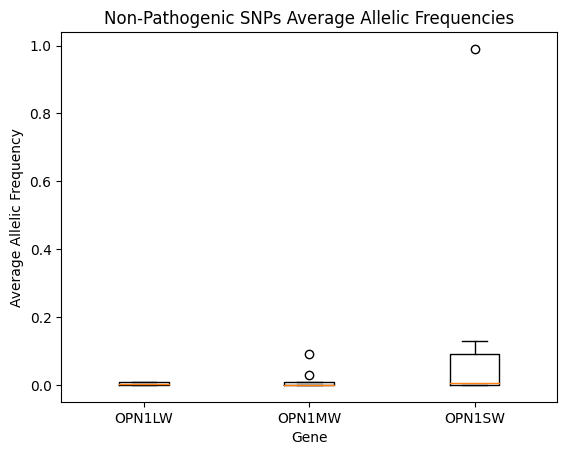

In [51]:
freq_data = [freqLWnum,freqMWnum,freqSWnum]

plt.boxplot(freq_data,labels=('OPN1LW','OPN1MW','OPN1SW'))
plt.title('Non-Pathogenic SNPs Average Allelic Frequencies')
plt.ylabel('Average Allelic Frequency')
plt.xlabel('Gene')

perform anova test to see if there is significant difference between average allelic frequencies of each gene (assume alpha = 0.05)

In [31]:
test = scipy.stats.f_oneway(freqLWnum,freqMWnum,freqSWnum)
print(test)

F_onewayResult(statistic=1.1698314064712758, pvalue=0.32334282635205275)


since p-val>0.05, the 3 means are not significantly different

Read in files for gene expression analysis

In [32]:
df1 = pd.read_csv("E-GEUV-1-query-results.fpkms.tsv",header=4,sep='\t')
df2 = pd.read_excel('just_sample_info.xlsx',header=0)

print(df2.head())

    Sample Family ID Population           Population Description  Gender  \
0  HG00096   HG00096        GBR  British in England and Scotland    male   
1  HG00097   HG00097        GBR  British in England and Scotland  female   
2  HG00098   HG00098        GBR  British in England and Scotland    male   
3  HG00099   HG00099        GBR  British in England and Scotland  female   
4  HG00100   HG00100        GBR  British in England and Scotland  female   

  Relationship Unexpected Parent/Child  Non Paternity Siblings Grandparents  \
0          NaN                      NaN           NaN      NaN          NaN   
1          NaN                      NaN           NaN      NaN          NaN   
2          NaN                      NaN           NaN      NaN          NaN   
3          NaN                      NaN           NaN      NaN          NaN   
4          NaN                      NaN           NaN      NaN          NaN   

  Avuncular Half Siblings Unknown Second Order Third Order  Other Co

separate populations into different dataframes

In [33]:
def col_move(df, keyword):
    df_new = pd.DataFrame()
    move = [col for col in df.columns if keyword in col]
    move.insert(0,df.columns[1])
    df_new = df[move].copy()

    return df_new

brit = col_move(df1,'British')
finl = col_move(df1,'Finland')
tusc = col_move(df1,'Tuscan')
utah = col_move(df1,'Utah')
yoru = col_move(df1,'Yoruba')


separate the patients ids so they be joined on the population sample info file

In [85]:
def cleanup(df, substring):
    df.columns = df.columns.str.replace(substring, '')
    return df

brit_clean = cleanup(brit,'British, ')
finl_clean = cleanup(finl, 'Finland, ')
tusc_clean = cleanup(tusc, 'Tuscan, ')
utah_clean = cleanup(utah, 'Utah, ')
yoru_clean = cleanup(yoru, 'Yoruba, ')

In [79]:
brit_clean1 = brit_clean[(brit_clean['Gene Name']=='OPN1LW') | (brit_clean['Gene Name']=='OPN1MW') | (brit_clean['Gene Name']=='OPN1SW')]
finl_clean1 = finl_clean[(finl_clean['Gene Name']=='OPN1LW') | (finl_clean['Gene Name']=='OPN1MW') | (finl_clean['Gene Name']=='OPN1SW')]
tusc_clean1 = tusc_clean[(tusc_clean['Gene Name']=='OPN1LW') | (tusc_clean['Gene Name']=='OPN1MW') | (tusc_clean['Gene Name']=='OPN1SW')]
utah_clean1 = utah_clean[(utah_clean['Gene Name']=='OPN1LW') | (utah_clean['Gene Name']=='OPN1MW') | (utah_clean['Gene Name']=='OPN1SW')]
yoru_clean1 = yoru_clean[(yoru_clean['Gene Name']=='OPN1LW') | (yoru_clean['Gene Name']=='OPN1MW') | (yoru_clean['Gene Name']=='OPN1SW')]

calculate the averages for each gene (swap in each population)

In [80]:
avg_B = brit_clean1.copy()

avg_B['Avg'] = avg_B.mean(axis=1)
check = avg_B.iloc[:,[0,95]]

sorted = check.sort_values(by='Avg',ascending=False)

print(sorted.head())

     Gene Name       Avg
5923    OPN1SW  1.175532
2563    OPN1LW       NaN


C:\Users\sabri\AppData\Local\Temp\ipykernel_33408\2550389465.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_B['Avg'] = avg_B.mean(axis=1)


In [81]:
avg_T = tusc_clean1.copy()

avg_T['Avg'] = avg_T.mean(axis=1)
check = avg_T.iloc[:,[0,94]]

sorted = check.sort_values(by='Avg',ascending=False)

print(sorted.head())

     Gene Name       Avg
5923    OPN1SW  1.269892
2563    OPN1LW       NaN


C:\Users\sabri\AppData\Local\Temp\ipykernel_33408\165109947.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_T['Avg'] = avg_T.mean(axis=1)


In [82]:
avg_F = finl_clean1.copy()

avg_F['Avg'] = avg_F.mean(axis=1)
check = avg_F.iloc[:,[0,96]]

sorted = check.sort_values(by='Avg',ascending=False)

print(sorted.head())

     Gene Name       Avg
5923    OPN1SW  1.281053
2563    OPN1LW       NaN


C:\Users\sabri\AppData\Local\Temp\ipykernel_33408\2790784233.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_F['Avg'] = avg_F.mean(axis=1)


In [83]:
avg_U = utah_clean1.copy()

avg_U['Avg'] = avg_U.mean(axis=1)
check = avg_U.iloc[:,[0,92]]

sorted = check.sort_values(by='Avg',ascending=False)

print(sorted.head())

     Gene Name       Avg
5923    OPN1SW  1.058242
2563    OPN1LW  0.100000


C:\Users\sabri\AppData\Local\Temp\ipykernel_33408\176907036.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_U['Avg'] = avg_U.mean(axis=1)


In [84]:
avg_Y = yoru_clean1.copy()

avg_Y['Avg'] = avg_Y.mean(axis=1)
check = avg_Y.iloc[:,[0,90]]

sorted = check.sort_values(by='Avg',ascending=False)

print(sorted.head())

     Gene Name       Avg
5923    OPN1SW  0.710112
2563    OPN1LW       NaN


C:\Users\sabri\AppData\Local\Temp\ipykernel_33408\1237919282.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_Y['Avg'] = avg_Y.mean(axis=1)


[1.0 1.0 1.0 1.0 1.0 2.0 3.0 2.0 1.0 1.0 2.0 1.0 1.0 2.0 2.0 2.0 1.0 1.0
 1.0 0.7 1.0 2.0 2.0 1.0 1.0 0.9 1.0 1.0 1.0 1.0 0.9 1.0 1.0 0.6 1.0 1.0
 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 0.9 2.0 0.9 1.0 2.0 2.0 0.7
 2.0 0.9 0.9 0.5 0.8 1.0 2.0 0.8 0.5 0.6 2.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0
 0.7 0.8 1.0 2.0 0.4 2.0 0.9 0.8 1.0 0.8 1.0 1.0 1.0 1.0 1.0 1.0 0.9 1.0
 1.0 1.0 1.0 0.6]


Text(0.5, 0, 'Population Group')

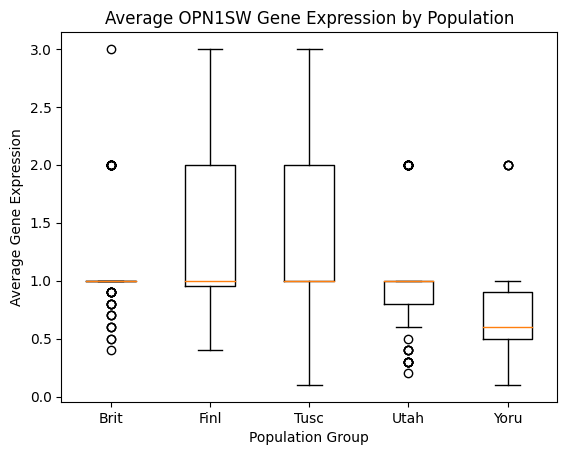

In [71]:
SW_arr_B= np.array(brit_clean1.iloc[1,1:])
SW_arr_F= np.array(finl_clean1.iloc[1,1:])
SW_arr_T= np.array(tusc_clean1.iloc[1,1:])
SW_arr_U= np.array(utah_clean1.iloc[1,1:])
SW_arr_Y= np.array(yoru_clean1.iloc[1,1:])
all_data = [SW_arr_B,SW_arr_F,SW_arr_T,SW_arr_U,SW_arr_Y]

print(SW_arr_B)

plt.boxplot(all_data,labels=('Brit','Finl','Tusc','Utah','Yoru'))
plt.title('Average OPN1SW Gene Expression by Population')
plt.ylabel('Average Gene Expression')
plt.xlabel('Population Group')

check to see if avgs make sense

In [43]:
notswapperoo = brit_clean1.set_index(brit_clean1.columns[0])
brit_swapperoo = notswapperoo.T

brit_summary = brit_swapperoo.describe()
print(brit_summary)

Gene Name  OPN1LW     OPN1SW
count         0.0  94.000000
mean          NaN   1.175532
std           NaN   0.497237
min           NaN   0.400000
25%           NaN   1.000000
50%           NaN   1.000000
75%           NaN   1.000000
max           NaN   3.000000


now check for male/female

In [44]:
print(df1.head())

           Gene ID Gene Name  British, HG00096  British, HG00097  \
0  ENSG00000000003    TSPAN6               NaN               NaN   
1  ENSG00000000005      TNMD               NaN               NaN   
2  ENSG00000000419      DPM1              50.0              37.0   
3  ENSG00000000457     SCYL3               4.0               3.0   
4  ENSG00000000460  C1orf112               4.0               5.0   

   British, HG00099  British, HG00100  British, HG00101  British, HG00102  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2              48.0              45.0              47.0              61.0   
3               3.0               3.0               4.0               4.0   
4               5.0               4.0               6.0               5.0   

   British, HG00103  British, HG00104  ...  Yoruba, NA19214  Yoruba, NA19222  \
0               NaN               0.1  ...      

cleanup sample info to have just gender and id

In [45]:
sample_info = df2.iloc[:,[0,4]]

print(sample_info.head())

    Sample  Gender
0  HG00096    male
1  HG00097  female
2  HG00098    male
3  HG00099  female
4  HG00100  female


cleanup df1 to have just gene ids

In [46]:
exp_mat = df1.drop(df1.columns[0],axis=1)

exp_mat.columns = exp_mat.columns.str.replace('British, ', '')
exp_mat.columns = exp_mat.columns.str.replace('Tuscan, ','')
exp_mat.columns = exp_mat.columns.str.replace('Yoruba, ','')
exp_mat.columns = exp_mat.columns.str.replace('Utah, ','')
exp_mat.columns = exp_mat.columns.str.replace('Finland, ','')

notswapperoo = exp_mat.set_index(exp_mat.columns[0])
swapperoo = notswapperoo.T

print(swapperoo)

Gene Name  TSPAN6  TNMD  DPM1  SCYL3  C1orf112   FGR  CFH  FUCA2  GCLC  NFYA  \
HG00096       NaN   NaN  50.0    4.0       4.0  45.0  NaN   10.0   3.0  13.0   
HG00097       NaN   NaN  37.0    3.0       5.0  39.0  NaN   10.0   2.0  15.0   
HG00099       NaN   NaN  48.0    3.0       5.0  38.0  NaN   12.0   3.0  14.0   
HG00100       NaN   NaN  45.0    3.0       4.0  54.0  NaN   11.0   2.0  14.0   
HG00101       NaN   NaN  47.0    4.0       6.0  40.0  NaN   13.0   3.0  15.0   
...           ...   ...   ...    ...       ...   ...  ...    ...   ...   ...   
NA19236       0.1   NaN  53.0    4.0       5.0  64.0  NaN   15.0   3.0  19.0   
NA19247       0.1   NaN  61.0    4.0       6.0  37.0  NaN   14.0   2.0  16.0   
NA19248       0.1   NaN  44.0    3.0       6.0  28.0  NaN   11.0   3.0  19.0   
NA19256       NaN   NaN  43.0    4.0       5.0  52.0  NaN   10.0   3.0  16.0   
NA19257       NaN   NaN  26.0    3.0       4.0  24.0  NaN   14.0   2.0  12.0   

Gene Name  ...  ENSG00000285979  ENSG00

join the two dfs

In [47]:
joined_df = swapperoo.merge(sample_info, left_on=swapperoo.index,right_on=sample_info['Sample'],how='inner')

print(joined_df)

       key_0  TSPAN6  TNMD  DPM1  SCYL3  C1orf112   FGR  CFH  FUCA2  GCLC  \
0    HG00096     NaN   NaN  50.0    4.0       4.0  45.0  NaN   10.0   3.0   
1    HG00097     NaN   NaN  37.0    3.0       5.0  39.0  NaN   10.0   2.0   
2    HG00099     NaN   NaN  48.0    3.0       5.0  38.0  NaN   12.0   3.0   
3    HG00100     NaN   NaN  45.0    3.0       4.0  54.0  NaN   11.0   2.0   
4    HG00101     NaN   NaN  47.0    4.0       6.0  40.0  NaN   13.0   3.0   
..       ...     ...   ...   ...    ...       ...   ...  ...    ...   ...   
457  NA19236     0.1   NaN  53.0    4.0       5.0  64.0  NaN   15.0   3.0   
458  NA19247     0.1   NaN  61.0    4.0       6.0  37.0  NaN   14.0   2.0   
459  NA19248     0.1   NaN  44.0    3.0       6.0  28.0  NaN   11.0   3.0   
460  NA19256     NaN   NaN  43.0    4.0       5.0  52.0  NaN   10.0   3.0   
461  NA19257     NaN   NaN  26.0    3.0       4.0  24.0  NaN   14.0   2.0   

     ...  ENSG00000285984  LINC02689  ENSG00000285986  NBEAP6  \
0    ...  

put each gender in its own dataframe

In [61]:
female1 = joined_df[joined_df['Gender'] == 'female'].copy()
male1 = joined_df[joined_df['Gender'] == 'male'].copy()

female1 = female1.drop(['Sample','Gender'],axis=1)
male1 = male1.drop(['Sample','Gender'],axis=1)



female2 = female1.set_index(female1.columns[0])
male2 = male1.set_index(male1.columns[0])

female = female2.T
male = male2.T

print(female)

key_0            HG00097  HG00099  HG00100  HG00102  HG00104  HG00106  \
TSPAN6               NaN      NaN      NaN      NaN      0.1      NaN   
TNMD                 NaN      NaN      NaN      NaN      NaN      NaN   
DPM1                37.0     48.0     45.0     61.0     50.0     56.0   
SCYL3                3.0      3.0      3.0      4.0      3.0      4.0   
C1orf112             5.0      5.0      4.0      5.0      3.0      5.0   
...                  ...      ...      ...      ...      ...      ...   
NBEAP6               NaN      NaN      NaN      NaN      NaN      NaN   
ENSG00000285991      NaN      NaN      NaN      NaN      NaN      NaN   
ENSG00000285992      NaN      NaN      NaN      NaN      NaN      NaN   
ENSG00000285993      NaN      NaN      NaN      NaN      NaN      NaN   
ENSG00000285994      0.1      NaN      NaN      0.1      0.1      NaN   

key_0            HG00110  HG00111  HG00118  HG00120  ...  NA19201  NA19204  \
TSPAN6               NaN      0.2      0.1   

Text(0.5, 0, 'Sex')

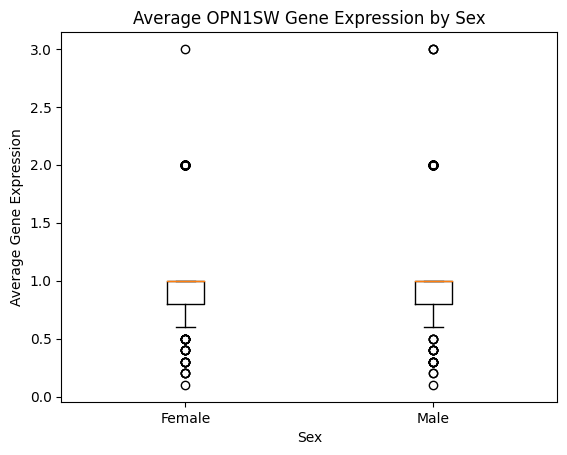

In [78]:
lw_fem = np.array(female[female.index=='OPN1LW'])
sw_fem = np.array(female[female.index=='OPN1SW'])
lw_fem = lw_fem.flatten()
sw_fem = sw_fem.flatten()

lw_mal = np.array(male[male.index=='OPN1LW'])
sw_mal = np.array(male[male.index=='OPN1SW'])
lw_mal = lw_mal.flatten()
sw_mal = sw_mal.flatten()

sw_comb = [sw_fem,sw_mal]

plt.boxplot(sw_comb,labels=('Female','Male'))
plt.title('Average OPN1SW Gene Expression by Sex')
plt.ylabel('Average Gene Expression')
plt.xlabel('Sex')




now do avgs for gender

In [49]:
avg1 = female.copy()

avg1['Avg'] = avg1.mean(axis=1)
check1 = avg1.iloc[:,[0,246]]

mygenes_f = check1[(check1.index=='OPN1LW') | (check1.index=='OPN1MW') | (check1.index=='OPN1SW')]
print(mygenes_f)

key_0   HG00097       Avg
OPN1LW      NaN       NaN
OPN1SW      1.0  1.084959


In [50]:
avg2 = male.copy()

avg2['Avg'] = avg2.mean(axis=1)
check2 = avg2.iloc[:,[0,216]]

mygenes_m = check2[(check2.index=='OPN1LW') | (check2.index=='OPN1MW') | (check2.index=='OPN1SW')]
print(mygenes_m)

key_0   HG00096       Avg
OPN1LW      NaN  0.100000
OPN1SW      1.0  1.124537
